# Imports

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#warnings.simplefilter("ignore")
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from importlib import reload
from common import baseclasses
from NearFieldOptics.Materials import material_types
from NearFieldOptics import Materials as M
#reload(M)

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Bi2Se3_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "PMMA_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "sio2_300nm_extracted_epsilon_cone_A=2a.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_230K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_30K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Erik_BSTS_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_295K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_360K.csv"...
<material_types.Ta

# Drude metal with decreasing damping rate (e.g. metal-to-superconductor)

<plotting>:
	Registered colormaps "Warm" and "Warm_r"...
<plotting>:
	Registered colormaps "vanheum" and "vanheum_r"...
<plotting>:
	Registered colormaps "NT-MDT" and "NT-MDT_r"...
<plotting>:
	Registered colormaps "rainbow" and "rainbow_r"...
<plotting>:
	Registered colormaps "jingdi" and "jingdi_r"...
<plotting>:
	Registered colormaps "Halcyon" and "Halcyon_r"...
<plotting>:
	Registered colormaps "Cold" and "Cold_r"...
<plotting>:
	Registered colormaps "Sky" and "Sky_r"...
<plotting>:
	Registered colormaps "Gwyddion.net" and "Gwyddion.net_r"...
<plotting>:
	Registered colormaps "BlueRed" and "BlueRed_r"...
<plotting>:
	Registered colormaps "vanheum3" and "vanheum3_r"...
<plotting>:
	Registered colormaps "vanheum2" and "vanheum2_r"...


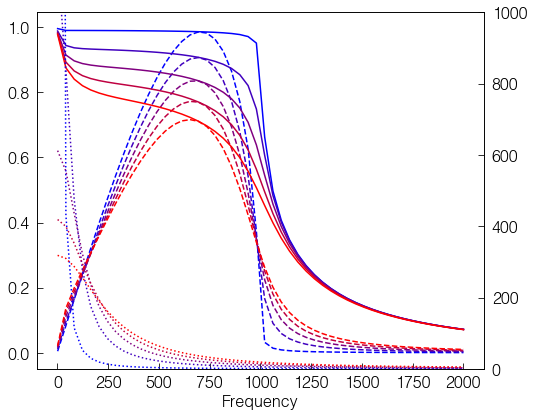

In [2]:
from common.plotting import bluered_colors
import warnings
warnings.filterwarnings('error')
wp=1e3
freqs=np.linspace(1,2*wp)

get_sigma = lambda eps: (eps-1)*freqs/(4*np.pi*1j)

N=5
cs=bluered_colors(N)
gammas=np.linspace(wp/100,wp/4,N)
f=plt.figure(figsize=(8,6))
ax1=plt.gca()
ax2=plt.twinx()
for g in gammas:
    c=next(cs)
    m=M.IsotropicMaterial(drude_params=(wp,g))
    R=m.reflection_p(freqs,angle=0)
    plt.sca(ax1)
    np.abs(R).plot(color=c)
    np.imag(R).plot(color=c,ls='--')
    
    e=m.epsilon(freqs)
    sigma=get_sigma(e).real
    plt.sca(ax2)
    plt.plot(freqs,sigma,color=c,ls=':')
    plt.ylim(0,1000)

In [3]:
rp=m.reflection_p(freqs,angle=30)
rp=m.reflection_p(rp,angle=30)

# STO phonon shift spectroscopy

In [4]:
fs=np.linspace(600,1000,500)

def reflection_STO(f0,gamma=2):
    
    LOs=[(wLO**2-wTO**2,f0,gamma)]
    m1=M.IsotropicMaterial(eps_lps=LOs,eps_infinity=2)
    r=m1.reflection_p(fs,angle=60)
    
    return r

def plot_STO_shift(df=10,gamma=2):
    
    f0=630
    f1=f0; f2=f1+df
    r1=reflection_STO(f1,gamma=gamma)
    r2=reflection_STO(f2,gamma=gamma)
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    np.abs(r1).plot(color='b')
    np.abs(r2).plot(color='b',ls='--')
    plt.twinx()
    plt.plot(fs,np.unwrap(np.angle(r1)),color='r')
    plt.plot(fs,np.unwrap(np.angle(r2)),color='r',ls='--')
    
    plt.subplot(122)
    np.abs(r2/r1).plot(color='b')
    #plt.ylim(0,3)
    plt.ylabel('Amplitude ratio',color='b')
    plt.twinx()
    plt.plot(fs,np.angle(r2/r1),color='r')
    plt.ylabel('Relative phase',color='r',rotation=270,labelpad=30)
    plt.ylim(-np.pi,np.pi)
    
    plt.subplots_adjust(wspace=.3)
    plt.show()

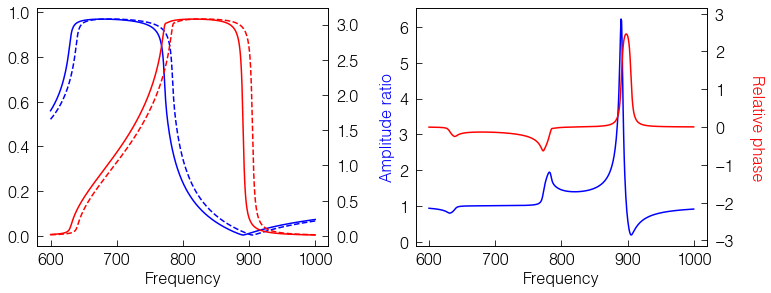

In [5]:
plot_STO_shift(df=10,gamma=5)

In [6]:
from NearFieldOptics import TipModels as T

In [9]:
a=20           # Radius of tip apex for a near-field probe, in nanometers
q_a=1/a        # This defines the characteristic in-plane momentum for near-fields in SNOM
Nqs = 244      # Number of q values at which to evaluate
Nzs = 16       # Number of z values at which to evaluate
A = 80         # Oscillation amplitude in nanometers
norm_at = 1000 # Frequency at which to normalize signal
norm_to=M.Au   # Material to which model will normalize signal (in this case, gold)

ws = np.linspace(550,800,100)

gamma=2
f0=630
LOs=[(1*f0**2,f0,gamma)]
m1=M.IsotropicMaterial(eps_lps=LOs,eps_infinity=2)

S = T.LightningRodModel(ws, \
                       rp=m1.reflection_p,    \
                       a=a, Nqs=Nqs, Nzs=Nzs, amplitude=A, \
                       normalize_to=norm_to.reflection_p,  \
                       normalize_at=norm_at)

<__init__._LightningRodModel_.__call__>:
	Getting signal...
<__init__._LightningRodModel_.get_signal>:
	Computing near-field signal with Lightning Rod Model...
<__init__._LightningRodModel_.prepare_model>:
	Preparing model...
<__init__._LightningRodModel_.load_charge_data>:
	Loading charge data from file "/Users/alexandersmcleod/tools/python/NearFieldOptics/TipModels/ChargeData/HyperboloidCharge_L=6.33E+02_SkinDepth=5.00E-02_Taper=20_Quad=TS_Nzs=244_Nqs=244_freq=3.00E-03.pickle"...
	Using incident beam profile: "plane_wave"
	Incidence angle: 30 degrees
	Computing xWarp quadrature for q-values...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=550.0 cm^-1...


Exception ignored in: <_io.FileIO name='/Users/alexandersmcleod/tools/python/NearFieldOptics/TipModels/ChargeData/HyperboloidCharge_L=6.33E+02_SkinDepth=5.00E-02_Taper=20_Quad=TS_Nzs=244_Nqs=244_freq=3.00E-03.pickle' mode='rb' closefd=True>


	PROGRESS: 1% - Computing state of the tip charge v. z & s at freq=552.5252525252525 cm^-1...
	PROGRESS: 2% - Computing state of the tip charge v. z & s at freq=555.0505050505051 cm^-1...
	PROGRESS: 3% - Computing state of the tip charge v. z & s at freq=557.5757575757576 cm^-1...
	PROGRESS: 4% - Computing state of the tip charge v. z & s at freq=560.10101010101 cm^-1...
	PROGRESS: 5% - Computing state of the tip charge v. z & s at freq=562.6262626262626 cm^-1...
	PROGRESS: 6% - Computing state of the tip charge v. z & s at freq=565.1515151515151 cm^-1...
	PROGRESS: 7% - Computing state of the tip charge v. z & s at freq=567.6767676767677 cm^-1...
	PROGRESS: 8% - Computing state of the tip charge v. z & s at freq=570.2020202020202 cm^-1...
	PROGRESS: 9% - Computing state of the tip charge v. z & s at freq=572.7272727272727 cm^-1...
	PROGRESS: 10% - Computing state of the tip charge v. z & s at freq=575.2525252525253 cm^-1...
	PROGRESS: 11% - Computing state of the tip charge v. z & s a

	PROGRESS: 88% - Computing state of the tip charge v. z & s at freq=772.2222222222222 cm^-1...
	PROGRESS: 89% - Computing state of the tip charge v. z & s at freq=774.7474747474747 cm^-1...
	PROGRESS: 90% - Computing state of the tip charge v. z & s at freq=777.2727272727273 cm^-1...
	PROGRESS: 91% - Computing state of the tip charge v. z & s at freq=779.7979797979798 cm^-1...
	PROGRESS: 92% - Computing state of the tip charge v. z & s at freq=782.3232323232323 cm^-1...
	PROGRESS: 93% - Computing state of the tip charge v. z & s at freq=784.8484848484849 cm^-1...
	PROGRESS: 94% - Computing state of the tip charge v. z & s at freq=787.3737373737374 cm^-1...
	PROGRESS: 95% - Computing state of the tip charge v. z & s at freq=789.8989898989898 cm^-1...
	PROGRESS: 96% - Computing state of the tip charge v. z & s at freq=792.4242424242424 cm^-1...
	PROGRESS: 97% - Computing state of the tip charge v. z & s at freq=794.9494949494949 cm^-1...
	PROGRESS: 98% - Computing state of the tip charge

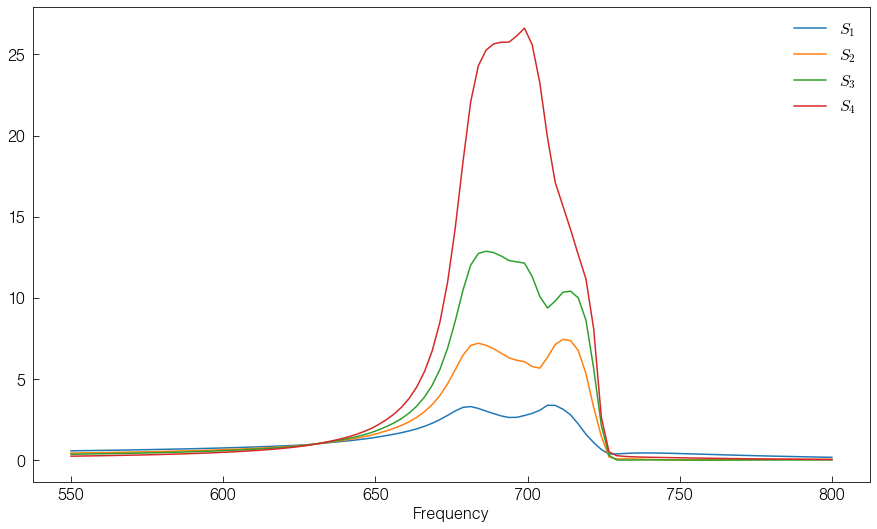

In [10]:
plt.figure(figsize=(15,8))
np.abs(S["signal_1"]).plot(label="$S_1$")
np.abs(S["signal_2"]).plot(label="$S_2$")
np.abs(S["signal_3"]).plot(label="$S_3$")
np.abs(S["signal_4"]).plot(label="$S_4$")
plt.legend();

In [11]:
T.LightningRodModel.get_signal?